# TITANIC

### RESUMEN

### Importamos librerias

In [73]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Cargamos el Dataset

In [74]:
# Leemos el dataset y lo convertimos en un dataframe
df = pd.read_csv('titanic.csv')

In [75]:
# Imprimimos el dataset
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
# Vemos el número de nulos en las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vemos que en la columna 'Age' hay pocos valores nulos por lo que se puede reparar, mientras que en 
la columna 'Cabin' hay bastantes más por lo que procederemos a eliminarla. Asimismo en la columna 'Embarked' hay solamente 2, por lo que procederemos a rellenar esos datos tambien.

In [77]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
media = df['Age'].mean() # Calculamos la media de la columna
print(media)

29.69911764705882


In [79]:
df['Age'].fillna(media, inplace= True) # Rellenamos la columna Age con la media ya que es de tipo Float

In [80]:
moda = df['Embarked'].mode().values[0] # Calculamos la moda de la columna

In [81]:
df['Embarked'].fillna(moda, inplace= True) # Rellenamos la columna Embarked con la moda ya que es de tipo object

In [82]:
df.isnull().sum() # Comprobamos que no hay valores nulos en las columnas reparadas

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [83]:
df.drop('Cabin', axis=1, inplace=True) # Eliminamos la columna 'Cabin'

In [84]:
df.info() # Comprobamos que ya no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [85]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [86]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

Una vez reparado el dataset, vemos que tipos de columnas tenemos y como podemos jugar con ellas

In [87]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### Significado de cada columna
PassengerId -> Muestra el id del Pasajero (solamente es un indicador.) //
Survived -> Se encuentra en 2 valores 0 si murió en la trajedia y 1 si sobrevivió // 
Pclass -> Determina la clase del pasajero, 1ra, 2da o 3era clase. // 
Name -> Nombre de los Pasajeros // 
Sex -> Sexo de los Pasajeros // 
Age -> Edad de los Pasajeros //
SibSp -> Número de parientes como Hermano, Hermana, Hermanastra, Hermanastro, Esposo o Esposa. // 
Parch -> Número de parientes como Madre, Padre, Hijo, Hija, Hijastro, Hijastra // 
Ticket -> Número del ticket o boleto. // 
Fare -> Tarifa del pasaje. // 
Cabin -> Número de cabina del pasajero. // 
Embarked -> Muestra los datos del puerto de embarcadero. (C = Cherbourg, Q = Queenston, S = Southapmtpon)

Fuente: ''Rafael Pacheco Algalan y Adrian Homero Moreno''

### Preguntas interesantes sobre el Dataset

- ¿Cuantas personas han sobrevivido?
- ¿Cuales fueron las personas con mayor y menor edad en subir al barco?¿Y la edad media?
- ¿Había más mujeres o más hombre?
- ¿Cual es el % de mujeres que sobrevivieron, y de hombres?
- Relacion entre la clase del pasajero y si sobrevivieron o no
- Relación entre la edad y si sobrevivieron o no
- ¿Cuales fueron los 10 billetes más caros?
- Relacion entre el precio y el puerto de embarcadero
- ¿Había muchas familias?

#### ¿Cuantas personas han sobrevivido?

In [88]:
df['Survived'].value_counts() # Donde el 1 es que sobrevivieron, se ve que menos de la mitad sobrevivieron al accidente

Survived
0    549
1    342
Name: count, dtype: int64

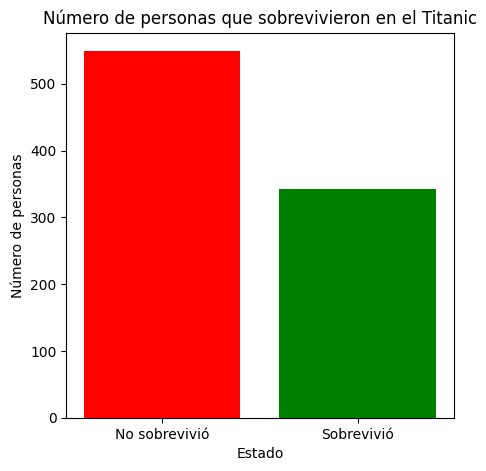

In [89]:
# Crear un gráfico de barras para reflejarlo de maneras más fácil y visual
supervivientes = df['Survived'].value_counts()
supervivientes_columnas = ['No sobrevivió', 'Sobrevivió']

plt.figure(figsize=(5, 5)) # Tamaño uniforme
plt.bar(supervivientes_columnas, supervivientes, color=['red', 'green']) # Colores caracteristicos
plt.title('Número de personas que sobrevivieron en el Titanic')
plt.xlabel('Estado')
plt.ylabel('Número de personas')

plt.show()


#### ¿Cuales fueron las personas con mayor y menor edad en subir al barco?¿Y la edad media?

In [90]:
df['Age'].describe() 
# Aquí tenemos a la persona más longeva con 80 años y la más pequeña con 0 años y 4 meses. 
# También tenemos la media de edad, situada en 29,7 años.

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


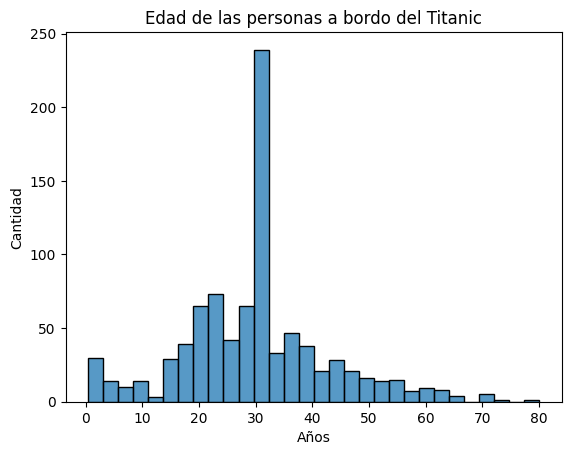

In [91]:
sns.histplot(df['Age'])
plt.xlabel('Años') # Añade un titulo al eje X
plt.ylabel('Cantidad') # Añade un titulo al eje Y
plt.title("Edad de las personas a bordo del Titanic");


#### ¿Había más mujeres o más hombre?

In [92]:
df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [93]:
total_pasajeros = len(df) # Creamos la variable
mujeres = df[df['Sex'] == 'female'] # Separamos la variable mujeres
hombres = df[df['Sex'] == 'male'] # Separamos la variable hombre

porcentaje_mujeres = (len(mujeres) / total_pasajeros) * 100 # Dividimos la cantidad de mujeres entre el total
porcentaje_hombres = (len(hombres) / total_pasajeros) * 100 # Dividimos la cantidad de hombres entre el total

print(f"Mujeres: {porcentaje_mujeres}%")
print(f"Hombres: {porcentaje_hombres}%")


Mujeres: 35.24130190796858%
Hombres: 64.75869809203144%


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


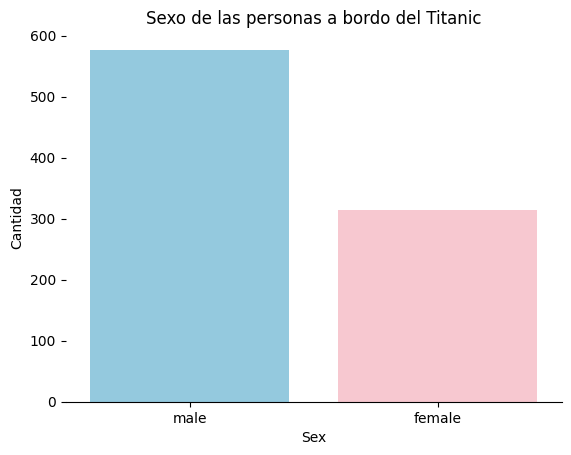

In [94]:
sns.countplot(x=df['Sex'],data=df, palette={'male': '#87CEEB', 'female': 'pink'}) # Mezclamos 2 maneras de cambio de color
plt.ylabel('Cantidad') # Añade un titulo al eje Y
plt.title("Sexo de las personas a bordo del Titanic");
sns.despine(left=True) # Suprimimos el marco tanto de arriba como de la izquierda

#### ¿Cual es el % de mujeres que sobrevivieron, y de hombres?

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


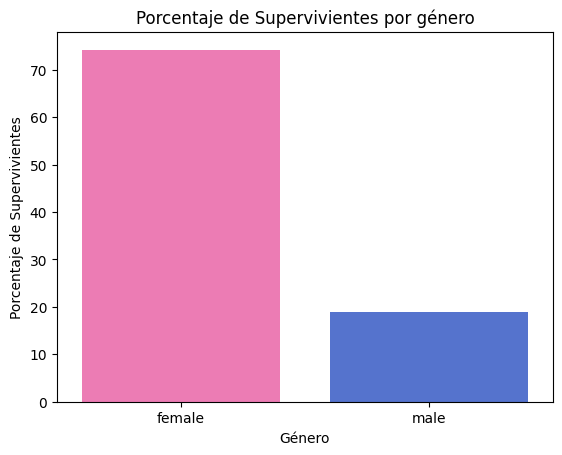

In [95]:
# Primero hay que agrupar la columna sexo y supervivientes
Superviviente_por_genero = df.groupby(['Sex', 'Survived']).size().unstack()

# Ahora calculamos el porcentaje de sobrevivientes por género
Porcentaje_supervivientes = (Superviviente_por_genero[1] / (Superviviente_por_genero[0] + Superviviente_por_genero[1])) * 100

# Creamos la gráfica y cambiamos los colores de la anterior para que haya diferencia
sns.barplot(x=Porcentaje_supervivientes.index, y=Porcentaje_supervivientes.values, palette={'male': '#4169E1', 'female': '#FF69B4'})
plt.xlabel('Género')
plt.ylabel('Porcentaje de Supervivientes')
plt.title('Porcentaje de Supervivientes por género')
plt.show()

#### ¿Qué relacion hay entre la clase del pasajero y si sobrevivieron o no?

In [96]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [97]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [98]:
# Primero hay que agrupar la columna clase y supervivientes
Superviviente_por_clase = df.groupby(['Pclass', 'Survived']).size().unstack()
print(Superviviente_por_clase)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


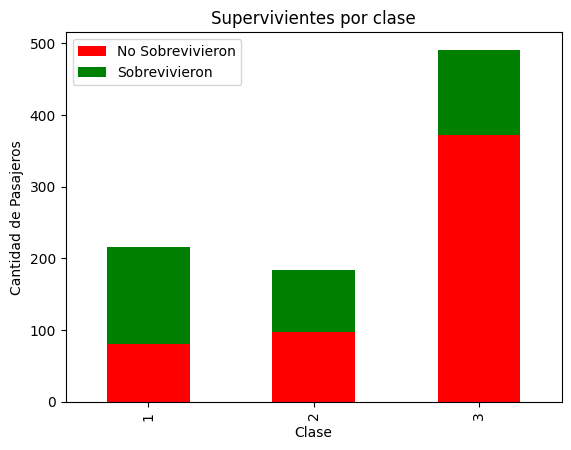

In [99]:
Superviviente_por_clase.plot(kind='bar', stacked=True, color=['red', 'green'])
# Creamos el grafico de barras, creando una legenda para distinguir a los que sobrevivieron

plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Supervivientes por clase')
plt.legend(['No Sobrevivieron', 'Sobrevivieron'])
plt.show()

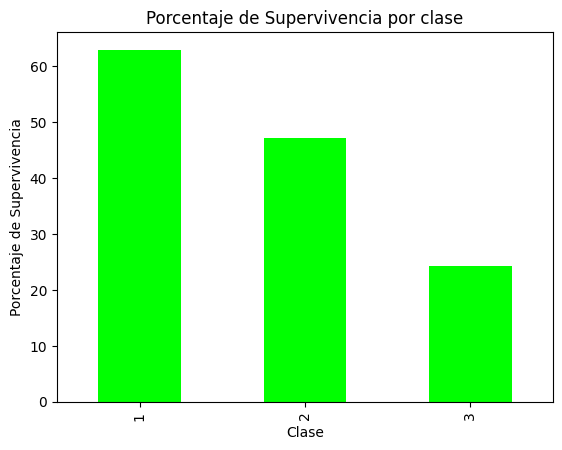

In [100]:
# Calcular el porcentaje de supervivencia para cada clase
Superviviente_por_clase['Porcentaje_supervivientes'] = (Superviviente_por_clase[1] / (Superviviente_por_clase[0] + Superviviente_por_clase[1])) * 100

# Crear el gráfico de barras
Superviviente_por_clase['Porcentaje_supervivientes'].plot(kind='bar', color='#00FF00')
plt.xlabel('Clase')
plt.ylabel('Porcentaje de Supervivencia')
plt.title('Porcentaje de Supervivencia por clase')
plt.show()


#### ¿Qué relación hay entre la edad y si sobrevivieron o no?

In [134]:
Superviviente_por_edad = df.groupby(['Age', 'Survived']).size().unstack()
print(Superviviente_por_edad)


Survived    0    1
Age               
0.42      NaN  1.0
0.67      NaN  1.0
0.75      NaN  2.0
0.83      NaN  2.0
0.92      NaN  1.0
...       ...  ...
70.00     2.0  NaN
70.50     1.0  NaN
71.00     2.0  NaN
74.00     1.0  NaN
80.00     NaN  1.0

[89 rows x 2 columns]


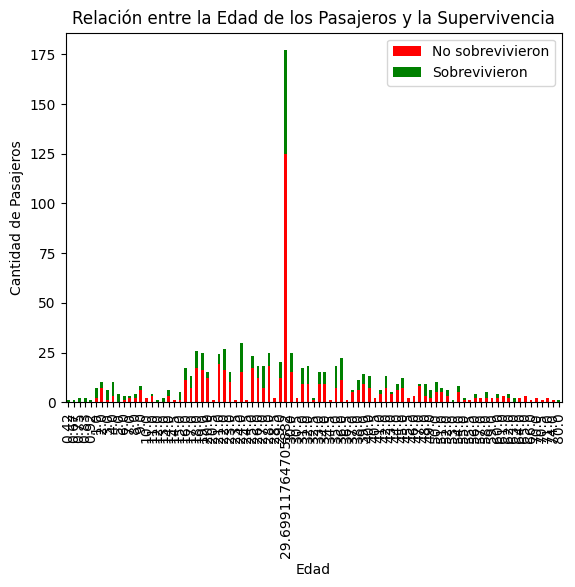

In [139]:
Superviviente_por_edad.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xlabel('Edad',)
plt.ylabel('Cantidad de Pasajeros')
plt.title('Relación entre la Edad de los Pasajeros y la Supervivencia')
plt.legend(['No sobrevivieron', 'Sobrevivieron'])
plt.show()

#### ¿Cuales fueron los 10 billetes más caros?¿Quien los compró?

In [151]:
billetes_mas_caros = df.nlargest(10, 'Fare')
print(billetes_mas_caros)

     PassengerId  Survived  Pclass                                   Name  \
258          259         1       1                       Ward, Miss. Anna   
679          680         1       1     Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1                 Lesurer, Mr. Gustave J   
27            28         0       1         Fortune, Mr. Charles Alexander   
88            89         1       1             Fortune, Miss. Mabel Helen   
341          342         1       1         Fortune, Miss. Alice Elizabeth   
438          439         0       1                      Fortune, Mr. Mark   
311          312         1       1             Ryerson, Miss. Emily Borie   
742          743         1       1  Ryerson, Miss. Susan Parker "Suzette"   
118          119         0       1               Baxter, Mr. Quigg Edmond   

        Sex   Age  SibSp  Parch    Ticket      Fare Embarked  
258  female  35.0      0      0  PC 17755  512.3292        C  
679    male  36.0      0  

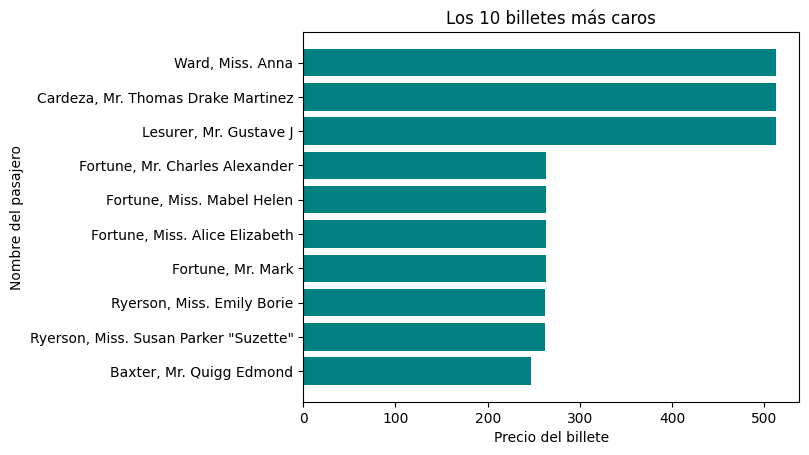

In [157]:
# Gráfico de barras horizontales
plt.barh(billetes_mas_caros['Name'], billetes_mas_caros['Fare'], color='teal')
plt.xlabel('Precio del billete')
plt.ylabel('Nombre del pasajero')
plt.title('Los 10 billetes más caros')
plt.gca().invert_yaxis()  # Invierto el eje para que aparezcan los más caros arriba
plt.show()


#### ¿Cual es la relacion entre el precio y el puerto de embarcadero?

In [158]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [171]:
df.groupby('Embarked')['Fare'].describe()


,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
Q,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
S,646.0,27.243651,35.952905,0.0000,8.05000,13.00,27.900000,263.0000


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


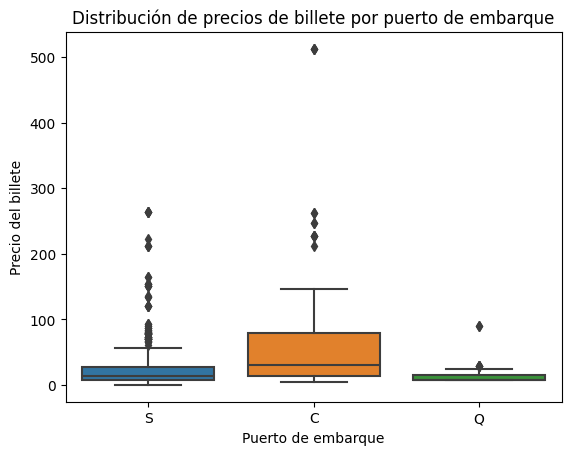

In [172]:
# Con el gráfico de boxplot, podemos ver si hay diferencias significativas en el precio
sns.boxplot(x='Embarked', y='Fare', data=df)
plt.xlabel('Puerto de embarque')
plt.ylabel('Precio del billete')
plt.title('Distribución de precios de billete por puerto de embarque')
plt.show()


#### ¿Había muchas familias?


In [173]:
df['Family'] = df['Parch'] + df['SibSp'] # Sumamos ambas columnas donde hay parientes

In [184]:
Total_familias = len(df[df['Family'] > 0])
print(Total_familias) # Tenemos un total de 354 personas que son parientes entre si

354
